<a href="https://colab.research.google.com/github/mincfranc/DD_DataScience/blob/main/10_28_24_Homework_Project3_SQL_1_Chinook_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


#Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [1]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database


In [2]:
# Install supressed and updated sqlite3 package to interact with SQLite database within Jupyter nb on Ubuntu system


%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [3]:
# @title sqlite3- help

!sqlite3 --help

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [4]:
#Download chinook.zip file by checking if it's present otherwise transfer via curl and display list without extracting.


%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [5]:
#Unzip program to extract files with updated versions

!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [6]:
#Display detailed files/folders in long list format, including hidden data.

#ls: magics shell command to list contents of a directory(folder)
#-l: tells ls to display in long list
#-a: tells ls to show all files including hidden
!ls -la


total 1180
drwxr-xr-x 1 root root   4096 Oct 28 06:16 .
drwxr-xr-x 1 root root   4096 Oct 28 06:14 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 28 06:16 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 24 13:20 .config
drwxr-xr-x 1 root root   4096 Oct 24 13:20 sample_data


In [7]:
# Get a list of the tables in the database

%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [8]:
# Show the schema for the entire database

%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


In [9]:
#from 10_16_24_2d-sqlite3-Selects,  10_17_24_a 2f-sqlite3-chinook, 10_17_24_ x_X_2f-sqlite3-chinooK lectures

### Basic Queries


#### SELECT (with * and with column names)


In [10]:
# RETURN all employee info
#%%script sqlite3 --column --header chinook.db: Command used in jupyter notebooks to run external scripts. Tells nb to execute code using sqlite3 command-line tool
# %%script: Jupyter magic command
# sqlite3: specifies command-line tool to interact with SQLITE databases
# --column: tells sql3 to format output in columns
# --header: tells sql3 to include column headers in output
# chinook.db: name of sql db file to be queried

 # SELECT: keyword specifies table 'employees' from which to retrieve
 # FROM: keyword retrieves data from ALL columns in db

In [11]:
# RETURN all employee info

%%script sqlite3 --column --header chinook.db
select *
from employees
;

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [12]:
# RETURN all customer info

%%script sqlite3 --column --header chinook.db
select *
from customers

CustomerId  FirstName  LastName      Company                                           Address                                   City                 State   Country         PostalCode  Phone                Fax                 Email                          SupportRepId
----------  ---------  ------------  ------------------------------------------------  ----------------------------------------  -------------------  ------  --------------  ----------  -------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves     Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170           São José dos Campos  SP      Brazil          12227-000   +55 (12) 3923-5555   +55 (12) 3923-5566  luisg@embraer.com.br           3           
2           Leonie     Köhler                                                          Theodor-Heuss-Straße 34                   Stuttgart                    Germany         70174       +

In [13]:
# RETURN all employee info from only the specific column names 'EmployeeID..'

%%script sqlite3 --column --header chinook.db

select EmployeeId, LastName, FirstName, Title, ReportsTo
from employees

EmployeeId  LastName  FirstName  Title                ReportsTo
----------  --------  ---------  -------------------  ---------
1           Adams     Andrew     General Manager               
2           Edwards   Nancy      Sales Manager        1        
3           Peacock   Jane       Sales Support Agent  2        
4           Park      Margaret   Sales Support Agent  2        
5           Johnson   Steve      Sales Support Agent  2        
6           Mitchell  Michael    IT Manager           1        
7           King      Robert     IT Staff             6        
8           Callahan  Laura      IT Staff             6        


In [14]:
# RETURN all customer info from only the specific column names 'CustomerID...'

%%script sqlite3 --column --header chinook.db
select CustomerID, FirstName, LastName, SupportRepID
from customers

CustomerId  FirstName  LastName      SupportRepId
----------  ---------  ------------  ------------
1           Luís       Gonçalves     3           
2           Leonie     Köhler        5           
3           François   Tremblay      3           
4           Bjørn      Hansen        4           
5           František  Wichterlová   4           
6           Helena     Holý          5           
7           Astrid     Gruber        5           
8           Daan       Peeters       4           
9           Kara       Nielsen       4           
10          Eduardo    Martins       4           
11          Alexandre  Rocha         5           
12          Roberto    Almeida       3           
13          Fernanda   Ramos         4           
14          Mark       Philips       5           
15          Jennifer   Peterson      3           
16          Frank      Harris        4           
17          Jack       Smith         5           
18          Michelle   Brooks        3           


#### WHERE


In [15]:
#RETURN list of all customers who have SupportRep 4

%%script sqlite3 --column --header chinook.db
SELECT * FROM customers
WHERE SupportRepID = '4';

CustomerId  FirstName  LastName     Company           Address                                   City           State  Country         PostalCode  Phone                Fax                 Email                        SupportRepId
----------  ---------  -----------  ----------------  ----------------------------------------  -------------  -----  --------------  ----------  -------------------  ------------------  ---------------------------  ------------
4           Bjørn      Hansen                         Ullevålsveien 14                          Oslo                  Norway          0171        +47 22 44 22 22                          bjorn.hansen@yahoo.no        4           
5           František  Wichterlová  JetBrains s.r.o.  Klanova 9/506                             Prague                Czech Republic  14700       +420 2 4172 5555     +420 2 4172 5555    frantisekw@jetbrains.com     4           
8           Daan       Peeters                        Grétrystraat 63               

#### AND


In [16]:
#RETURN list of all customers from Denmark and have SupportRep 4

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE country = 'Denmark'
AND supportrepid= '4';

CustomerId  FirstName  LastName  Company  Address              City        State  Country  PostalCode  Phone           Fax  Email                  SupportRepId
----------  ---------  --------  -------  -------------------  ----------  -----  -------  ----------  --------------  ---  ---------------------  ------------
9           Kara       Nielsen            Sønder Boulevard 51  Copenhagen         Denmark  1720        +453 3331 9991       kara.nielsen@jubii.dk  4           


#### OR


In [17]:
#RETURN list of all customers from Brussels or from Buenos Aires

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE city = 'Brussels'
OR city= 'Buenos Aires';

CustomerId  FirstName  LastName   Company  Address             City          State  Country    PostalCode  Phone                Fax  Email                     SupportRepId
----------  ---------  ---------  -------  ------------------  ------------  -----  ---------  ----------  -------------------  ---  ------------------------  ------------
8           Daan       Peeters             Grétrystraat 63     Brussels             Belgium    1000        +32 02 219 03 03          daan_peeters@apple.be     4           
56          Diego      Gutiérrez           307 Macacha Güemes  Buenos Aires         Argentina  1106        +54 (0)11 4311 4333       diego.gutierrez@yahoo.ar  4           


#### LIKE (with % or _ wildcard)


In [18]:
#RETURN all info from customers whose last names end with 'a'

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE lastname LIKE '%a';


CustomerId  FirstName  LastName    Company               Address             City            State  Country  PostalCode  Phone               Fax                 Email                          SupportRepId
----------  ---------  ----------  --------------------  ------------------  --------------  -----  -------  ----------  ------------------  ------------------  -----------------------------  ------------
11          Alexandre  Rocha       Banco do Brasil S.A.  Av. Paulista, 2022  São Paulo       SP     Brazil   01310-200   +55 (11) 3055-3278  +55 (11) 3055-8131  alero@uol.com.br               5           
12          Roberto    Almeida     Riotur                Praça Pio X, 119    Rio de Janeiro  RJ     Brazil   20040-020   +55 (21) 2271-7000  +55 (21) 2271-7070  roberto.almeida@riotur.gov.br  3           
59          Puja       Srivastava                        3,Raj Bhavan Road   Bangalore              India    560001      +91 080 22289999                        puja_srivastava@yah

#### BETWEEN


In [19]:
#RETURN all info from invoices generated between Jan 1, 2013 and April 30, 2013

%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
WHERE invoicedate BETWEEN '2013-01-01' AND '2013-04-30';

InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity     BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  --------------  ------------  --------------  -----------------  -----
333        30          2013-01-02 00:00:00  230 Elgin Street                          Ottawa          ON            Canada          K2P 1L7            8.91 
334        39          2013-01-07 00:00:00  4, Rue Milton                             Paris                         France          75009              13.86
335        53          2013-01-15 00:00:00  113 Lupus St                              London                        United Kingdom  SW1V 3EN           0.99 
336        54          2013-01-28 00:00:00  110 Raeburn Pl                            Edinburgh                     United Kingdom  EH4 1HH            1.98 
337        56          2013-01-28 00:00:00  307 Macacha Gü

#### LIMIT



In [20]:
#RETURN all info on first 5 genres

%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
LIMIT 5;

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     


### Sorting and Grouping


#### ORDER BY


In [21]:
#RETURN all data from table 'invoices' in sorted by the values in 'total' column

%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
ORDER BY total
;

InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity          BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  -------------------  ------------  --------------  -----------------  -----
6          37          2009-01-19 00:00:00  Berger Straße 10                          Frankfurt                          Germany         60316              0.99 
13         16          2009-02-19 00:00:00  1600 Amphitheatre Parkway                 Mountain View        CA            USA             94043-1351         0.99 
20         54          2009-03-22 00:00:00  110 Raeburn Pl                            Edinburgh                          United Kingdom  EH4 1HH            0.99 
27         33          2009-04-22 00:00:00  5112 48 Street                            Yellowknife          NT            Canada          X1A 1N6            0.99 
34         12          2009-

#### DISTINCT


In [22]:
#Get a list of 10 unique composer names without duplicates

%%script sqlite3 --column --header chinook.db
select distinct Composer
from tracks
Limit 10
;

Composer                                                              
----------------------------------------------------------------------
Angus Young, Malcolm Young, Brian Johnson                             
                                                                      
F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                   
F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman
Deaffy & R.A. Smith-Diesel                                            
AC/DC                                                                 
Steven Tyler, Joe Perry, Jack Blades, Tommy Shaw                      
Steven Tyler, Joe Perry                                               
Steven Tyler, Joe Perry, Jim Vallance, Holly Knight                   
Steven Tyler, Joe Perry, Desmond Child                                


#### GROUP BY



In [23]:
#RETURN 3 columns grouped by customer id, giving a sum of total sales per customer and their billing country

%%script sqlite3 --column --header chinook.db
select customerid, SUM(total) AS total_sales, billingcountry
from invoices
GROUP BY customerid
;

CustomerId  total_sales  BillingCountry
----------  -----------  --------------
1           39.62        Brazil        
2           37.62        Germany       
3           39.62        Canada        
4           39.62        Norway        
5           40.62        Czech Republic
6           49.62        Czech Republic
7           42.62        Austria       
8           37.62        Belgium       
9           37.62        Denmark       
10          37.62        Brazil        
11          37.62        Brazil        
12          37.62        Brazil        
13          37.62        Brazil        
14          37.62        Canada        
15          38.62        Canada        
16          37.62        USA           
17          39.62        USA           
18          37.62        USA           
19          38.62        USA           
20          39.62        USA           
21          37.62        USA           
22          39.62        USA           
23          37.62        USA           


In [24]:
%%script sqlite3 --column --header chinook.db
SELECT Country, COUNT(*) AS CustomerCount
FROM Customers
GROUP BY Country;

Country         CustomerCount
--------------  -------------
Argentina       1            
Australia       1            
Austria         1            
Belgium         1            
Brazil          5            
Canada          8            
Chile           1            
Czech Republic  2            
Denmark         1            
Finland         1            
France          5            
Germany         4            
Hungary         1            
India           2            
Ireland         1            
Italy           1            
Netherlands     1            
Norway          1            
Poland          1            
Portugal        2            
Spain           1            
Sweden          1            
USA             13           
United Kingdom  3            


### Aggregates


#### MAX


In [25]:
#RETURN last invoice date from invoices table

%%script sqlite3 --column --header chinook.db
SELECT max(invoicedate)
FROM invoices
;

max(invoicedate)   
-------------------
2013-12-22 00:00:00


#### MIN


In [26]:
#RETURN earliest invoice date from invoices table

%%script sqlite3 --column --header chinook.db
SELECT min(invoicedate)
FROM invoices
;

min(invoicedate)   
-------------------
2009-01-01 00:00:00


#### SUM


In [27]:
#RETURN total sum of all invoices

%%script sqlite3 --column --header chinook.db
SELECT sum(total)
FROM invoices
;

sum(total)
----------
2328.6    


#### AVG


In [28]:
#RETURN avg invoice amount

%%script sqlite3 --column --header chinook.db

SELECT AVG(total) FROM invoices;


AVG(total)      
----------------
5.65194174757282


In [29]:
#verify InvoiceDate is in YYYY-MM-DD format

%%script sqlite3 --column --header chinook.db

SELECT
    InvoiceId,
    InvoiceDate
FROM
    invoices
LIMIT 10;


InvoiceId  InvoiceDate        
---------  -------------------
1          2009-01-01 00:00:00
2          2009-01-02 00:00:00
3          2009-01-03 00:00:00
4          2009-01-06 00:00:00
5          2009-01-11 00:00:00
6          2009-01-19 00:00:00
7          2009-02-01 00:00:00
8          2009-02-01 00:00:00
9          2009-02-02 00:00:00
10         2009-02-03 00:00:00


In [30]:
# RETURN average number of days in between invoices for each customer

# using WITH clause, Create CTE named "InvoiceDiff" from 'invoices' table, with 2 columns: Customer ID & aliased DaysBetween= to calculate difference in days between consecutive invoices per customer

# Create query using 2 columns from previous CTE "InvoiceDiff": aliasing Customers table as cust. & aliased AVG(DaysBetw). then JOINING  customers table using customerID as join key with customerId from "InvoiceDiff"

# filter out null rows for 'DaysBetw' and calculate avg individually by grouping by customerid

%%script sqlite3 --column --header chinook.db

WITH InvoiceDiff AS (
    SELECT
        CustomerId,
        (julianday(InvoiceDate) - julianday(LAG(InvoiceDate) OVER (PARTITION BY CustomerId ORDER BY InvoiceDate))) AS DaysBetw
    FROM
        invoices
)

SELECT
    cust.CustomerId,
    AVG(DaysBetw) AS AvgDaysBetweenInvoices
FROM
    InvoiceDiff
JOIN
    customers AS cust ON InvoiceDiff.CustomerId = cust.CustomerId
WHERE
    DaysBetw IS NOT NULL
GROUP BY
    cust.CustomerId;


CustomerId  AvgDaysBetweenInvoices
----------  ----------------------
1           207.5                 
2           214.833333333333      
3           214.833333333333      
4           289.166666666667      
5           207.5                 
6           264.333333333333      
7           214.833333333333      
8           289.166666666667      
9           207.5                 
10          264.333333333333      
11          214.833333333333      
12          266.0                 
13          207.5                 
14          264.333333333333      
15          214.833333333333      
16          266.0                 
17          207.5                 
18          207.5                 
19          214.833333333333      
20          214.833333333333      
21          289.166666666667      
22          207.5                 
23          298.0                 
24          214.833333333333      
25          289.166666666667      
26          207.5                 
27          264.3333

In [31]:
%%script sqlite3 --column --header chinook.db

WITH InvoiceDiff AS (
    SELECT
        CustomerId,
        (julianday(InvoiceDate) - julianday(LAG(InvoiceDate) OVER (PARTITION BY CustomerId ORDER BY InvoiceDate))) AS DaysBetw
    FROM
        invoices
), CustomerAverages AS (
    SELECT
        CustomerId,
        AVG(DaysBetw) AS AvgDaysBetweenInvoices
    FROM
        InvoiceDiff
    WHERE
        DaysBetw IS NOT NULL
    GROUP BY
        CustomerId
)

SELECT
    AVG(AvgDaysBetweenInvoices) AS MeanDaysBetweenInvoices
FROM
    CustomerAverages;

MeanDaysBetweenInvoices
-----------------------
234.60790960452        


#### COUNT



In [32]:
#RETURN list of countries listed by customers without duplicates

%%script sqlite3 --column --header chinook.db
select count(distinct country)
from customers

count(distinct country)
-----------------------
24                     


In [33]:
#RETURN total number of customers

%%script sqlite3 --column --header chinook.db
select count(distinct customerID)
from customers

count(distinct customerID)
--------------------------
59                        


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



```
METHOD: find x employee in employees table, find all customers associated with employee x, calculate sum of total from customer invoices
and assign as totalsales. Repeat method for all employees. Sort results so employees with most sales shown first.

#SELECT clause gets employee data from employees table and sums total from invoices table then assigns it to alias variable totalsales

#TO GET employees table connected to invoices, must first connect employees table to customers, then connect THAT to invoices==

#FROM clause starts from employees table which LEFT JOINS employeeID with supportrepID from customers table to link employees to their
assigned customers. Left join includes all employees even without assigned customers.

#LEFT JOIN invoices table with customers table joined previously. This extends join to include invoice data

#GROUP BY clause groups by employees data  first
#ORDER BY clause sorts results in descending order based on totalsales
```

In [34]:
#RETURN list of total sales generated by each employee, calculated as the sum of all invoice total by employee and displayed in descending order of total sales. Employee with highest sales is at top of list


%%script sqlite3 --column --header chinook.db
SELECT
Employees.EmployeeId,
Employees.FirstName,
Employees.LastName,
SUM(invoices.Total) AS TotalSales

FROM Employees
LEFT JOIN customers ON EmployeeId = customers.SupportRepId
LEFT JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY Employees.EmployeeId, Employees.FirstName, Employees.LastName
ORDER BY TotalSales DESC
;

EmployeeId  FirstName  LastName  TotalSales      
----------  ---------  --------  ----------------
3           Jane       Peacock   833.040000000001
4           Margaret   Park      775.400000000001
5           Steve      Johnson   720.160000000001
1           Andrew     Adams                     
2           Nancy      Edwards                   
6           Michael    Mitchell                  
7           Robert     King                      
8           Laura      Callahan                  


In [35]:
#Define SQL query which finds out which employee has the highest sales, and load results into a pandas dataframe. Then run graphics on data.

# Join table 'employees' with table 'customers' via employeeID to supportRepID
# Join that output to invoices table via 'customers' customer ID to customerID
# Display sum of total column per employee
# Sort in ascending order

import pandas as pd
import sqlite3

# Connect to database
conn = sqlite3.connect('chinook.db')

# Define SQL query
query = """
SELECT
    Employees.EmployeeId,
    Employees.FirstName,
    Employees.LastName,
    SUM(invoices.Total) AS TotalSales

FROM Employees
LEFT JOIN customers ON EmployeeId = customers.SupportRepId
LEFT JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY Employees.EmployeeId, Employees.FirstName, Employees.LastName
ORDER BY TotalSales DESC;
"""

# Execute query and store results in a DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Now 'df' contains the data as a DataFrame
print(df.head())  # Print the first few rows to verify

   EmployeeId FirstName LastName  TotalSales
0           3      Jane  Peacock      833.04
1           4  Margaret     Park      775.40
2           5     Steve  Johnson      720.16
3           1    Andrew    Adams         NaN
4           2     Nancy  Edwards         NaN


In [36]:
#Same as above but include dollar amount for employees with nulls

import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('chinook.db')

# Modified SQL query to include all employees
query = """
SELECT
    Employees.EmployeeId,
    Employees.FirstName,
    Employees.LastName,
    COALESCE(SUM(invoices.Total), 0) AS TotalSales  -- Use COALESCE to handle NULL values

FROM Employees
LEFT JOIN customers ON EmployeeId = customers.SupportRepId
LEFT JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY Employees.EmployeeId, Employees.FirstName, Employees.LastName
ORDER BY TotalSales DESC;
"""

# Execute query and store results in a DataFrame
df1 = pd.read_sql_query(query, conn)

# Print head of dataframe
print(df1.head()) # Added this line to print the head

# Close connection - Optional, good practice to add conn.close() after you are done with database operations
# conn.close()

   EmployeeId FirstName LastName  TotalSales
0           3      Jane  Peacock      833.04
1           4  Margaret     Park      775.40
2           5     Steve  Johnson      720.16
3           1    Andrew    Adams        0.00
4           2     Nancy  Edwards        0.00


In [37]:
#Same as above but include all 8 employees even with missing values or zero dollars in sales

import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('chinook.db')

# Modified SQL query to include all employees and handle NULL sales
query = """
SELECT
    E.EmployeeId,
    E.FirstName,
    E.LastName,
    COALESCE(SUM(I.Total), 0) AS TotalSales  -- Use COALESCE to replace NULL sales with 0

FROM Employees E
LEFT JOIN customers C ON E.EmployeeId = C.SupportRepId
LEFT JOIN invoices I ON C.CustomerId = I.CustomerId
GROUP BY E.EmployeeId, E.FirstName, E.LastName
ORDER BY TotalSales DESC;
"""

# Execute query and store results in a DataFrame
df2 = pd.read_sql_query(query, conn)

# Print the head of the dataframe to verify
print(df2)

# Close the connection - Optional, good practice to add conn.close() after you are done with database operations
conn.close()

   EmployeeId FirstName  LastName  TotalSales
0           3      Jane   Peacock      833.04
1           4  Margaret      Park      775.40
2           5     Steve   Johnson      720.16
3           1    Andrew     Adams        0.00
4           2     Nancy   Edwards        0.00
5           6   Michael  Mitchell        0.00
6           7    Robert      King        0.00
7           8     Laura  Callahan        0.00


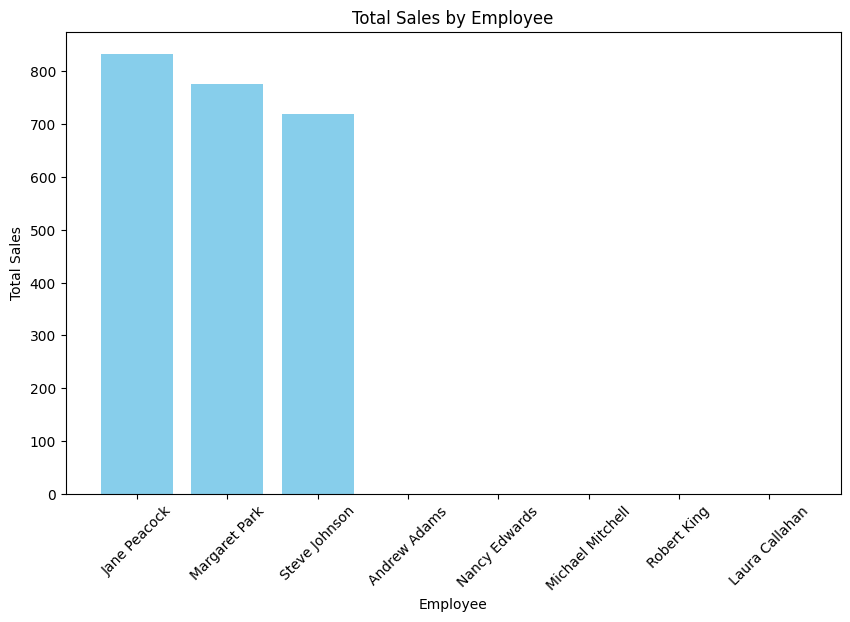

In [38]:
#Same as above and plot in barchart

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  # Import sqlite3

# Connect to the database
conn = sqlite3.connect('chinook.db')

# SQL query (from ipython-input-162-1498ee910209)
query = """
SELECT
    E.EmployeeId,
    E.FirstName,
    E.LastName,
    COALESCE(SUM(I.Total), 0) AS TotalSales  -- Use COALESCE to replace NULL sales with 0

FROM Employees E
LEFT JOIN customers C ON E.EmployeeId = C.SupportRepId
LEFT JOIN invoices I ON C.CustomerId = I.CustomerId
GROUP BY E.EmployeeId, E.FirstName, E.LastName
ORDER BY TotalSales DESC;
"""

# Execute the query and store results in a DataFrame
df2 = pd.read_sql_query(query, conn)

# Save the DataFrame to 'output.csv'
df2.to_csv('output.csv', index=False)  # Add this line to save the data

# Close the connection
conn.close()

# Now you can read it back if needed
df2 = pd.read_csv('output.csv')


# Plot
plt.figure(figsize=(10, 6))
# Access the columns using their correct names
plt.bar(df2['FirstName'] + ' ' + df2['LastName'], df2['TotalSales'], color='skyblue')
plt.title('Total Sales by Employee')
plt.xlabel('Employee')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [39]:
#CTE
#Create 2 CTEs to output data about employees and customers who are linked in 2 tables.
#first CTE: EmployeesCTE is aliased 'ec', second CTE: CustomersCTE aliased 'cc'
#'ec' consists of 5 columns, 'cc' consists of 4 columns
#Condition for JOINing both CTEs is based on their link from SupportRepId to EmployeeID
#INNER JOIN will display only records/rows where supportrepid matches employeeid

%%script sqlite3 --column --header chinook.db
WITH EmployeesCTE AS (
    SELECT
        EmployeeId, LastName, FirstName, Title, ReportsTo
    FROM employees
),
CustomersCTE AS (
    SELECT
        CustomerId, FirstName, LastName, SupportRepId
    FROM customers
)
SELECT
    ec.EmployeeId, ec.LastName, ec.FirstName, ec.Title, ec.ReportsTo,
    cc.CustomerId, cc.FirstName, cc.LastName
FROM CustomersCTE AS cc
INNER JOIN EmployeesCTE AS ec
ON cc.SupportRepId = ec.EmployeeId
;

EmployeeId  LastName  FirstName  Title                ReportsTo  CustomerId  FirstName  LastName    
----------  --------  ---------  -------------------  ---------  ----------  ---------  ------------
3           Peacock   Jane       Sales Support Agent  2          1           Luís       Gonçalves   
5           Johnson   Steve      Sales Support Agent  2          2           Leonie     Köhler      
3           Peacock   Jane       Sales Support Agent  2          3           François   Tremblay    
4           Park      Margaret   Sales Support Agent  2          4           Bjørn      Hansen      
4           Park      Margaret   Sales Support Agent  2          5           František  Wichterlová 
5           Johnson   Steve      Sales Support Agent  2          6           Helena     Holý        
5           Johnson   Steve      Sales Support Agent  2          7           Astrid     Gruber      
4           Park      Margaret   Sales Support Agent  2          8           Daan       Pee

In [40]:
#Query that joins two or more tables

#Business Need: identify trends in customer preferences, allowing for targeted marketing strategies. Do so by analyzing the distribution of tracks by media type.

#Question:  How can I retrieve a list of tracks along with their corresponding media types from db?

%%script sqlite3 --column --header chinook.db
SELECT
    t.Name AS TrackName,
    mt.Name AS MediaType
FROM
    tracks AS t
JOIN
    media_types AS mt ON t.MediaTypeId = mt.MediaTypeId
ORDER BY
    t.Name
LIMIT 20


TrackName                                                   MediaType                  
----------------------------------------------------------  ---------------------------
"40"                                                        MPEG audio file            
"?"                                                         Protected MPEG-4 video file
"Eine Kleine Nachtmusik" Serenade In G, K. 525: I. Allegro  Protected AAC audio file   
#1 Zero                                                     MPEG audio file            
#9 Dream                                                    Protected AAC audio file   
'Round Midnight                                             MPEG audio file            
(Anesthesia) Pulling Teeth                                  MPEG audio file            
(Da Le) Yaleo                                               MPEG audio file            
(I Can't Help) Falling In Love With You                     MPEG audio file            
(Oh) Pretty Woman               

In [41]:
#Create a predictive model

#Business need: Predict which genres and media types will sell best to plan next album launches.

#Question: Which genres and media types should we focus on for new music releases?

#Model: A Random Forest Regressor is used to predict the total sales of tracks based on genre and media type. The model is trained on historical data from the Chinook database. RFR model does not require one-hot encoding categorical variables like genre and media type.

#Outcome: The model's performance is evaluated using the Mean Squared Error (MSE).

#This is a Supervised Regression problem bc model is trained on labeled dataset (genre, media type) with known target variable (total sales) which is a continuous numerical variable.

#STEP 1: Data extraction- Pull track details, genre, media type, and sales information from table 'tracks', aliased as t. JOIN

%%script sqlite3 --column --header chinook.db

SELECT
t.TrackId,
t.Name AS TrackName,
g.Name AS Genre,
mt.Name AS MediaType,
SUM(ii.Quantity) AS TotalSales

FROM
tracks AS t

JOIN
genres AS g ON t.GenreId = g.GenreId

JOIN
media_types AS mt ON t.MediaTypeId = mt.MediaTypeId
JOIN

invoice_items AS ii ON t.TrackId = ii.TrackId

GROUP BY
t.TrackId, g.Name, mt.Name

ORDER BY
TotalSales DESC

LIMIT 20
;

TrackId  TrackName                  Genre               MediaType                 TotalSales
-------  -------------------------  ------------------  ------------------------  ----------
2        Balls to the Wall          Rock                Protected AAC audio file  2         
8        Inject The Venom           Rock                MPEG audio file           2         
9        Snowballed                 Rock                MPEG audio file           2         
20       Overdose                   Rock                MPEG audio file           2         
32       Deuces Are Wild            Rock                MPEG audio file           2         
48       Not The Doctor             Rock                MPEG audio file           2         
66       Por Causa De Você          Jazz                MPEG audio file           2         
84       Welcome Home (Sanitarium)  Metal               MPEG audio file           2         
161      Snowblind                  Metal               MPEG audio fil

In [42]:
conn = sqlite3.connect('chinook.db')

# # Execute the SQL query and load data into a DataFrame
query = """
SELECT
    t.TrackId,
    t.Name AS TrackName,
    g.Name AS Genre,
    mt.Name AS MediaType,
    SUM(ii.Quantity) AS TotalSales
FROM
    tracks AS t
JOIN
    genres AS g ON t.GenreId = g.GenreId
JOIN
    media_types AS mt ON t.MediaTypeId = mt.MediaTypeId
JOIN
    invoice_items AS ii ON t.TrackId = ii.TrackId
GROUP BY
    t.TrackId, g.Name, mt.Name
ORDER BY
    TotalSales DESC
;
"""
df = pd.read_sql_query(query, conn)
conn.close()


In [43]:
# Prepare the data for modeling:

# Encode categorical variables
df = pd.get_dummies(df, columns=['Genre', 'MediaType'], drop_first=True)

# Define features and target
X = df.drop(['TrackId', 'TrackName', 'TotalSales'], axis=1)
y = df['TotalSales']


In [44]:
# Model Creation

# Use a machine learning model to predict total sales

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.11


In [46]:
# Select the first 10 entries from joining the Customers and Employees tables

%%script sqlite3 --column --header chinook.db
select *
from customers
join employees
on customers.SupportRepID = employees.EmployeeID
limit 10
;

CustomerId  FirstName  LastName     Company                                           Address                               City                 State  Country         PostalCode  Phone               Fax                 Email                     SupportRepId  EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address           City     State  Country  PostalCode  Phone              Fax                Email                   
----------  ---------  -----------  ------------------------------------------------  ------------------------------------  -------------------  -----  --------------  ----------  ------------------  ------------------  ------------------------  ------------  ----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ----------------  -------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Luís       Gonçalv

In [47]:
#RETURN invoice with highest dollar value

%%script sqlite3 --column --header chinook.db
SELECT customerid, SUM(total) AS total_sales
FROM invoices
GROUP BY customerid
ORDER BY total_sales DESC
LIMIT 1
;

CustomerId  total_sales
----------  -----------
6           49.62      


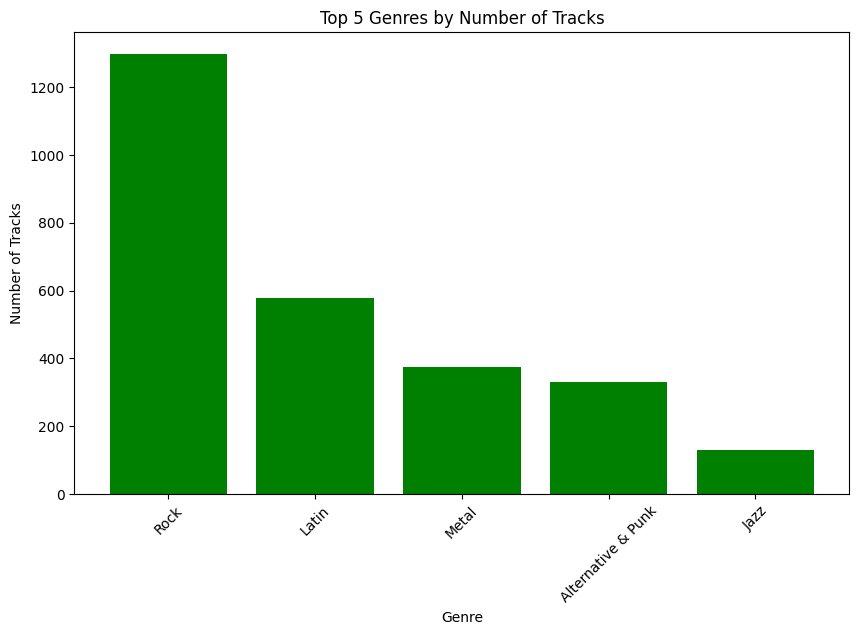

In [48]:
# Generate barchart with top 5 genres with most tracks.

#Method: Combine column Name from table 'genre' with column TrackId from table 'tracks', sorted by track count in descending order and displaying only 5 top genres.  Saved to a sql query to plot using matplotlib

# Connect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Execute SQL query
cursor.execute("""
SELECT genres.Name AS GenreName,
       COUNT(tracks.TrackId) AS TrackCount
FROM genres
JOIN tracks ON genres.GenreId = tracks.GenreId
GROUP BY genres.GenreId
ORDER BY TrackCount DESC
LIMIT 5;
""")

# Fetch the results and create a Pandas DataFrame
genre_data = pd.DataFrame(cursor.fetchall(), columns=['GenreName', 'TrackCount'])

# Close the database connection
conn.close()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(genre_data['GenreName'], genre_data['TrackCount'], color='green')
plt.title('Top 5 Genres by Number of Tracks')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

Steps to Plot SQL Query Results ( %%script sqlite3) in Jupyter Notebook/Colab using Python libraries like Matplotlib and Seaborn:



1. **Set Up Your Environment:**
   - Install necessary libraries (`pandas`, `matplotlib`, `seaborn`).

2. **Upload Your Database File (if using Colab).**

3. **Execute SQL Queries Using `%%script sqlite3`:**
   - Write the SQL query and redirect output to a CSV file.

4. **Read the Output into a Pandas DataFrame.**

5. **Plot the Data Using Matplotlib or Seaborn.**

6. **Repeat for Other Queries:**
   - Write new SQL queries, output to CSV, read into DataFrames, and create plots.

7. **Customize Your Plots.**

8. **Save or Export Your Plots (Optional).**